In [1]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile


import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as sps

import os

48000


/Users/bchhaglani/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


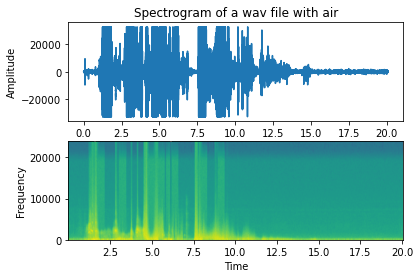

In [2]:
# Read the wav file (mono)
WAV_FILE_NAME  = 'air.wav'
samplingFrequency, signalData = wavfile.read(WAV_FILE_NAME)
times = np.arange(len(signalData))/samplingFrequency


print(samplingFrequency)
 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with air')

 

plot.plot(times,signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

In [3]:
def Filter(signal, low_cut, high_cut):
    fs = 48000.0
    lowcut = low_cut # 20.0
    highcut = high_cut # 50.0
    
    nyq = 0.5 * fs
    low = lowcut / nyq        # what values should I use in this bandpass filter...After applying this filter there is still noise in my audio           
    high = highcut / nyq      # i know this method should be user dynamic, however what values should I use to significantly reduce the noise
                              # also in our research, do we have to get rid of the noise? 
    
    order = 2
    
    b, a = scipy.signal.butter(order, [low,high], 'bandpass', analog = False)
    data = scipy.signal.filtfilt(b, a, signal, axis = 0)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(221)

    plt.plot(signal)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('before filtering')

    plt.subplot(222)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')


    plt.subplot(223)
    plt.specgram(signal, Fs=fs)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('before filtering')

    plt.subplot(224)
    plt.specgram(data, Fs=fs)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')

    plt.show()

    return(data)


def subsampling(prevdata, new_rate=1000):
    sampling_rate = 48000
    # Resample data
    number_of_samples = round(len(prevdata) * float(new_rate) / sampling_rate)
    data = sps.resample(prevdata, number_of_samples)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(221)

    plt.plot(prevdata)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('before subsampling')

    plt.subplot(222)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('after subsampling at ' + str(new_rate) + ' Hz')


    plt.subplot(223)
    plt.specgram(prevdata, Fs=sampling_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('before subsampling')

    plt.subplot(224)
    plt.specgram(data, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after subsampling at ' + str(new_rate) + ' Hz')

    plt.show()
    
    return data


def filter_then_subsample(signal, low_cut, high_cut, new_rate=1000):
    fs = 48000.0
    lowcut = low_cut # 20.0
    highcut = high_cut # 50.0
    
    nyq = 0.5 * fs
    low = lowcut / nyq        # what values should I use in this bandpass filter...After applying this filter there is still noise in my audio           
    high = highcut / nyq      # i know this method should be user dynamic, however what values should I use to significantly reduce the noise
                              # also in our research, do we have to get rid of the noise? 
    
    order = 2
    
    b, a = scipy.signal.butter(order, [low,high], 'bandpass', analog = False)
    filtered = scipy.signal.filtfilt(b, a, signal, axis = 0)
    
    sampling_rate = fs
    # Resample data
    number_of_samples = round(len(filtered) * float(new_rate) / sampling_rate)
    data = sps.resample(filtered, number_of_samples)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(231)

    plt.plot(signal)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('original signal')

    plt.subplot(232)

    plt.plot(filtered)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')

    plt.subplot(233)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('subsample('+ str(new_rate)+') after filtering')


    plt.subplot(234)
    plt.specgram(signal, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('original signal')

    plt.subplot(235)
    plt.specgram(filtered, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')

    plt.subplot(236)
    plt.specgram(data, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('subsample('+ str(new_rate)+') after filtering')

    plt.show()
    return data
    
    
    
def subsample_then_filter(prevdata,  low_cut, high_cut, new_rate=1000):

    # Read file
    sampling_rate = 48000.0

    # Resample data
    number_of_samples = round(len(prevdata) * float(new_rate) / sampling_rate)
    data = sps.resample(prevdata, number_of_samples)
    
    fs = 48000.0
    lowcut = low_cut # 20.0
    highcut = high_cut # 50.0
    
    nyq = 0.5 * fs
    low = lowcut / nyq        # what values should I use in this bandpass filter...After applying this filter there is still noise in my audio           
    high = highcut / nyq      # i know this method should be user dynamic, however what values should I use to significantly reduce the noise
                              # also in our research, do we have to get rid of the noise? 
    
    order = 2
    
    b, a = scipy.signal.butter(order, [low,high], 'bandpass', analog = False)
    y = scipy.signal.filtfilt(b, a, data, axis = 0)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(231)

    plt.plot(prevdata)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('original signal')

    plt.subplot(232)

    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('subsampled at '+ str(new_rate))

    plt.subplot(233)
    plt.plot(y)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('filter after subsampling')


    plt.subplot(234)
    plt.specgram(prevdata, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('original signal')

    plt.subplot(235)
    plt.specgram(data, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('subsampled at '+ str(new_rate))

    plt.subplot(236)
    plt.specgram(y, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('filter after subsampling')

    plt.show()
    return data
    
    
    
    return(y)
    
    
    

/Users/bchhaglani/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


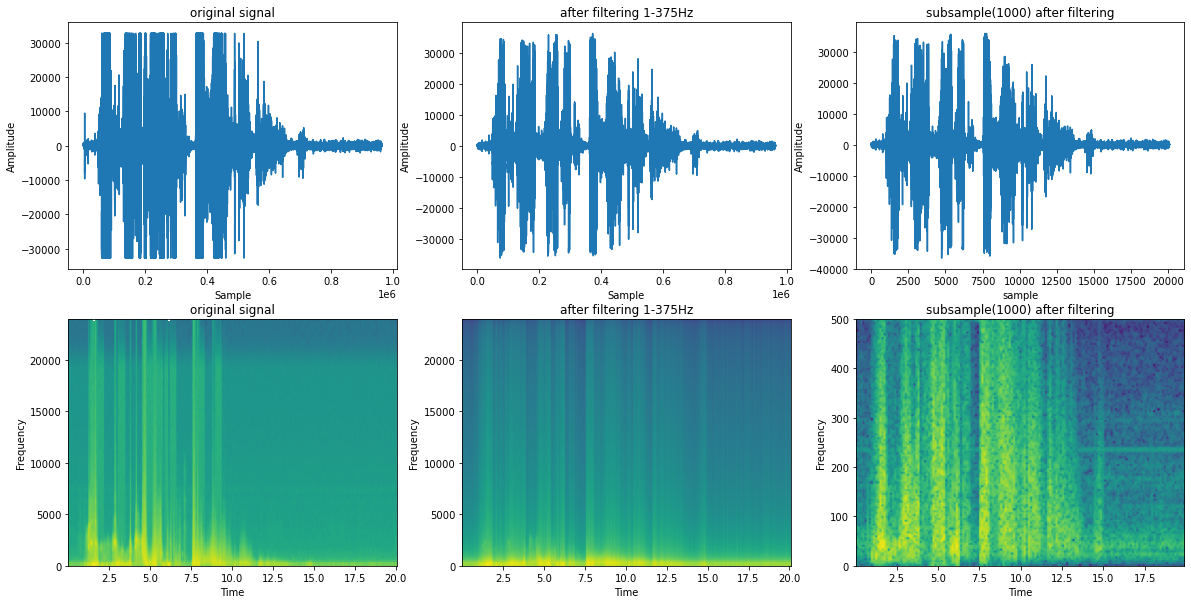

In [5]:
# Filter then Subsample
output = filter_then_subsample(signalData, 1, 375)

/Users/bchhaglani/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


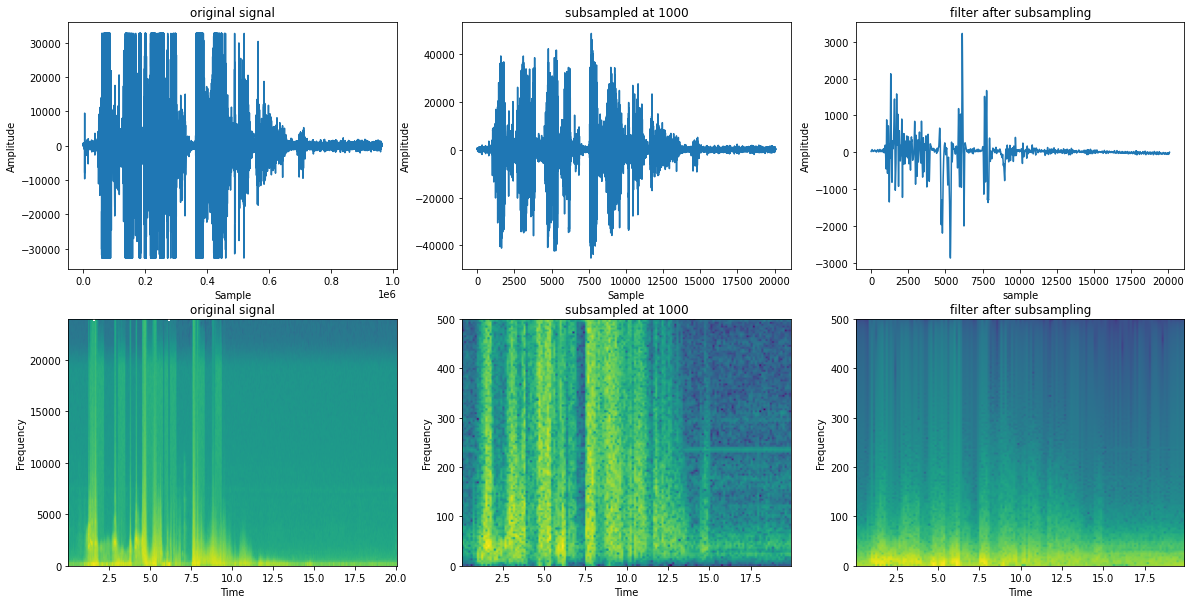

In [6]:
#Subsample then filter
output = subsample_then_filter(signalData, 1, 375)

/Users/bchhaglani/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


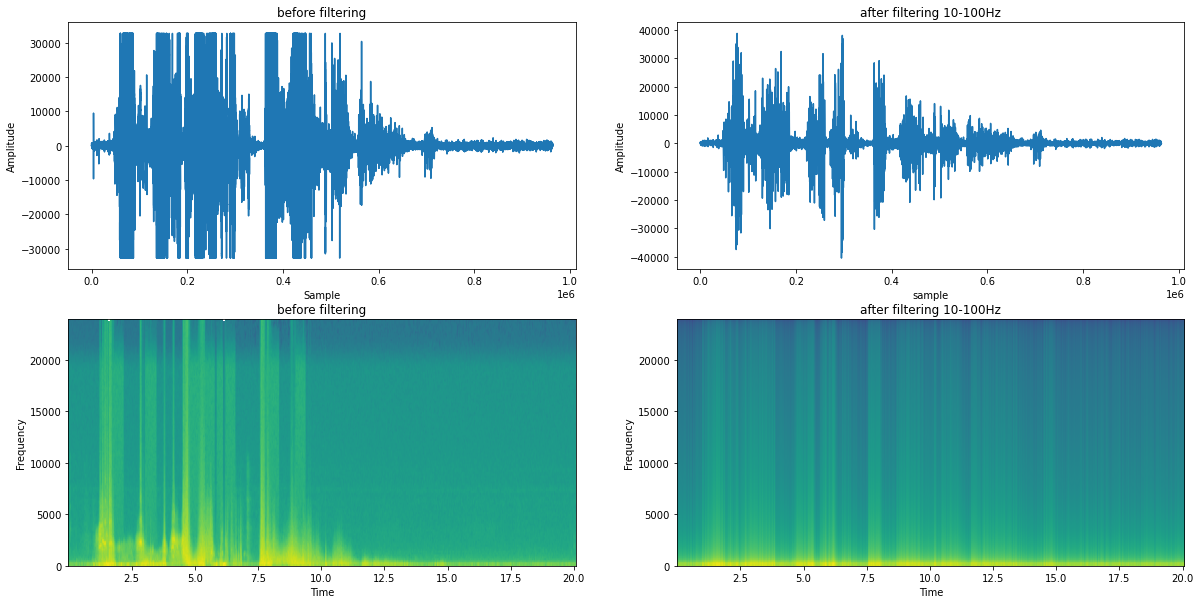

In [7]:
#only filter

output = Filter(signalData, 10, 100)

/Users/bchhaglani/miniforge3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


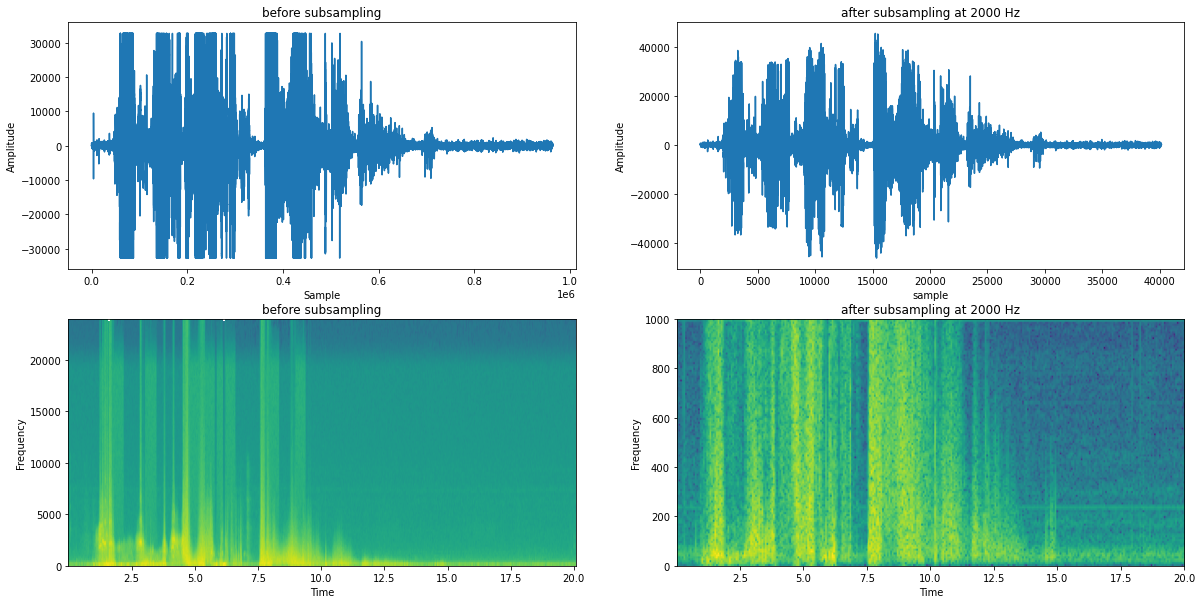

In [8]:
#only subsample
output = subsampling(signalData, 2000)